In [3]:
# リスト 4-6-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# ガウス関数
def gauss(x0, x1, mu, sigma):
    x = np.array([x0, x1])
    # 式 4-142
    a = 1 / (2 * np.pi) * 1 / (np.linalg.det(sigma) ** (1 / 2))
    # 式 4-138
    inv_sigma = np.linalg.inv(sigma)
    y = a * np.exp(
        (-1 / 2) * (x - mu).T @ inv_sigma @ (x - mu))
    return y
    

In [4]:
# リスト 4-6-(2)
x0, x1 = 2, 1
mu = np.array([1, 2])               # 平均ベクトル
sigma = np.array([[1, 0], [0, 1]])  # 共分散行列
y = gauss(x0, x1, mu, sigma)
print("y=", np.round(y, 6))

y= 0.05855


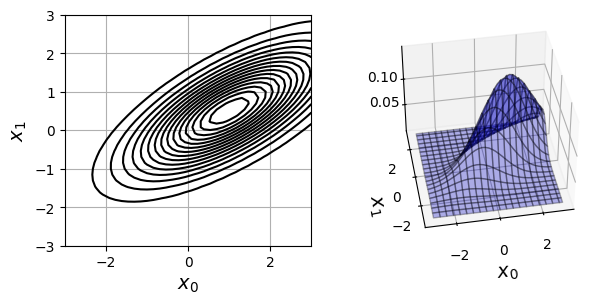

In [18]:
# リスト 4-6-(3)
# パラメータ -----
mu = np.array([1, 0.5])            # 平均ベクトル
sigma = np.array([[2, 1], [1, 1]]) # 共分散行列
x0_min, x0_max = -3, 3             # x0 の計算範囲
x1_min, x1_max = -3, 3             # x1 の計算範囲

# データ生成 -----
x0_n, x1_n = 40, 40                # グラフ表示の解像度
x0 = np.linspace(x0_min, x0_max, x0_n)
x1 = np.linspace(x1_min, x1_max, x1_n)
f = np.zeros((x1_n, x0_n))
for i0 in range(x0_n):
    for i1 in range(x1_n):
        f[i1, i0] = gauss(x0[i0], x1[i1], mu, sigma)

xx0, xx1 = np.meshgrid(x0, x1)      # グリッド座標の作成

# グラフ描画 -----
plt.figure(figsize=(7, 3))
# 等高線表示
plt.subplot(1, 2, 1)
cont = plt.contour(xx0, xx1, f, levels=15, colors="black")
plt.xlabel("$x_0$", fontsize=14)
plt.ylabel("$x_1$", fontsize=14)
plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.grid()
# サーフェイス表示
ax = plt.subplot(1, 2, 2, projection="3d")
ax.plot_surface(
    xx0, xx1, f,
    rstride=2, cstride=2, alpha=0.3, color="blue", edgecolor="black",
)
ax.set_zticks([0.05, 0.10])
ax.set_xlabel("$x_0$", fontsize=14)
ax.set_ylabel("$x_1$", fontsize=14)
ax.view_init(40, -100)
plt.show()